In [1]:
from google.colab import files
uploaded = files.upload()


Saving merded.csv to merded.csv


In [3]:
import pandas as pd
import io

# Read the file using pandas (example for CSV)
df = pd.read_csv(io.BytesIO(uploaded['merded.csv']))
print(df.head())


                                     augmented_tweet  label
0  ['If you get to know astir the statistics of r...      1
1  ['@ RahulGandhi Why it is that anyone who has ...      1
2  ['when modi promised â € œminimum government l...      1
3  ['talk totally the trumpery and continue all t...      1
4  ['asking his supporters prefix chowkidar their...      1


In [4]:

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('all')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |

True

In [5]:
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report


sns.set(style="darkgrid")
import pandas as pd
import numpy as np
import re
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.corpus import stopwords

In [7]:
df=pd.read_csv("merded.csv")

In [8]:
df

augmented_tweet  label
0     ['If you get to know astir the statistics of r...      1
1     ['@ RahulGandhi Why it is that anyone who has ...      1
2     ['when modi promised â € œminimum government l...      1
3     ['talk totally the trumpery and continue all t...      1
4     ['asking his supporters prefix chowkidar their...      1
...                                                 ...    ...
7979                You have a good attitude every day.      1
7980                You have a good attitude every day.      1
7981                You have a good attitude every day.      1
7982                You have a good attitude every day.      1
7983                You have a good attitude every day.      1

[7984 rows x 2 columns]

In [9]:
df1=df.dropna()

In [11]:
df.rename(columns={'label':'Hate or Offensive language - 0 and Not a Hate or Offensive language - 1'},inplace=True)
df.rename(columns={'augmented_tweet':'Tweets'},inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7984 entries, 0 to 7983
Data columns (total 2 columns):
 #   Column                                                                   Non-Null Count  Dtype 
---  ------                                                                   --------------  ----- 
 0   Tweets                                                                   7984 non-null   object
 1   Hate or Offensive language - 0 and Not a Hate or Offensive language - 1  7984 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 124.9+ KB


In [13]:
df1=df.dropna()

In [14]:
df1['Hate or Offensive language - 0 and Not a Hate or Offensive language - 1'] = df1['Hate or Offensive language - 0 and Not a Hate or Offensive language - 1'].astype(int)

In [15]:
df1.isna().sum()

Tweets                                                                     0
Hate or Offensive language - 0 and Not a Hate or Offensive language - 1    0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7984 entries, 0 to 7983
Data columns (total 2 columns):
 #   Column                                                                   Non-Null Count  Dtype 
---  ------                                                                   --------------  ----- 
 0   Tweets                                                                   7984 non-null   object
 1   Hate or Offensive language - 0 and Not a Hate or Offensive language - 1  7984 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 124.9+ KB


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7984 entries, 0 to 7983
Data columns (total 2 columns):
 #   Column                                                                   Non-Null Count  Dtype 
---  ------                                                                   --------------  ----- 
 0   Tweets                                                                   7984 non-null   object
 1   Hate or Offensive language - 0 and Not a Hate or Offensive language - 1  7984 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 124.9+ KB


In [18]:
df1['Hate or Offensive language - 0 and Not a Hate or Offensive language - 1'].value_counts()

Hate or Offensive language - 0 and Not a Hate or Offensive language - 1
1    4765
0    3219
Name: count, dtype: int64

<Axes: xlabel='Hate or Offensive language - 0 and Not a Hate or Offensive language - 1', ylabel='Count'>

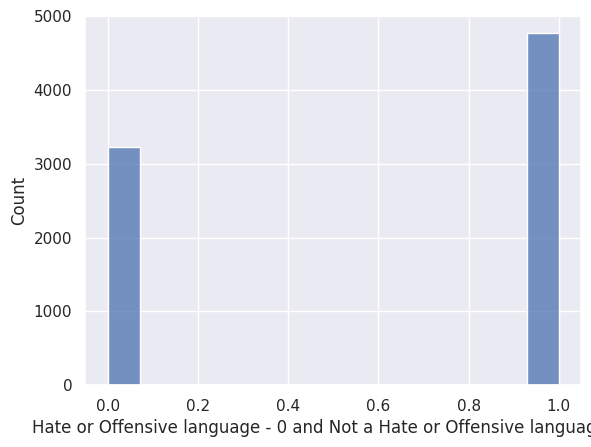

In [19]:
sns.histplot(df1['Hate or Offensive language - 0 and Not a Hate or Offensive language - 1'])

<Axes: xlabel='Hate or Offensive language - 0 and Not a Hate or Offensive language - 1', ylabel='count'>

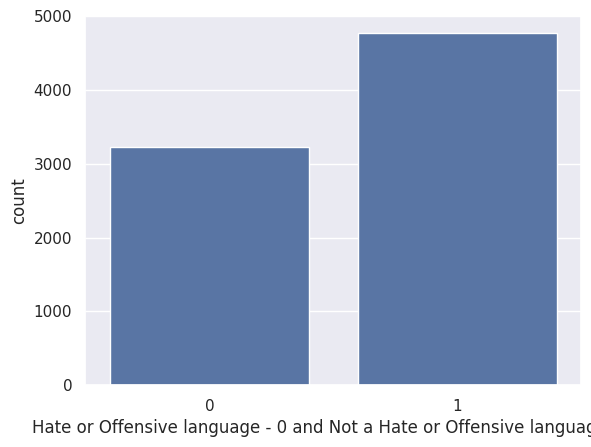

In [20]:
sns.countplot(x='Hate or Offensive language - 0 and Not a Hate or Offensive language - 1', data= df1)

**Data** **Preprocessing and Cleaning**

In [21]:
df1["Tweets"] = df1["Tweets"].apply(lambda x:re.sub(r'https?://\S+', '', str(x)))
df1["Tweets"]

0       ['If you get to know astir the statistics of r...
1       ['@ RahulGandhi Why it is that anyone who has ...
2       ['when modi promised â € œminimum government l...
3       ['talk totally the trumpery and continue all t...
4       ['asking his supporters prefix chowkidar their...
                              ...                        
7979                  You have a good attitude every day.
7980                  You have a good attitude every day.
7981                  You have a good attitude every day.
7982                  You have a good attitude every day.
7983                  You have a good attitude every day.
Name: Tweets, Length: 7984, dtype: object

In [22]:
# Lowercase removal
df1['Tweets'] = df1['Tweets'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df1['Tweets']

0       ['if you get to know astir the statistics of r...
1       ['@ rahulgandhi why it is that anyone who has ...
2       ['when modi promised â € œminimum government l...
3       ['talk totally the trumpery and continue all t...
4       ['asking his supporters prefix chowkidar their...
                              ...                        
7979                  you have a good attitude every day.
7980                  you have a good attitude every day.
7981                  you have a good attitude every day.
7982                  you have a good attitude every day.
7983                  you have a good attitude every day.
Name: Tweets, Length: 7984, dtype: object

In [23]:

df1['Tweets'] = df1['Tweets'].str.replace('[^\w\s]','')
df1['Tweets']

0       ['if you get to know astir the statistics of r...
1       ['@ rahulgandhi why it is that anyone who has ...
2       ['when modi promised â € œminimum government l...
3       ['talk totally the trumpery and continue all t...
4       ['asking his supporters prefix chowkidar their...
                              ...                        
7979                  you have a good attitude every day.
7980                  you have a good attitude every day.
7981                  you have a good attitude every day.
7982                  you have a good attitude every day.
7983                  you have a good attitude every day.
Name: Tweets, Length: 7984, dtype: object

In [24]:

df1['Tweets'] = df1['Tweets'].apply(lambda x:re.sub(r'@\w+', '', str(x)))
df1['Tweets']

0       ['if you get to know astir the statistics of r...
1       ['@ rahulgandhi why it is that anyone who has ...
2       ['when modi promised â € œminimum government l...
3       ['talk totally the trumpery and continue all t...
4       ['asking his supporters prefix chowkidar their...
                              ...                        
7979                  you have a good attitude every day.
7980                  you have a good attitude every day.
7981                  you have a good attitude every day.
7982                  you have a good attitude every day.
7983                  you have a good attitude every day.
Name: Tweets, Length: 7984, dtype: object

In [25]:
# Emoji Removal
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
df1['Tweets']= df1['Tweets'].apply(str)
df1['Tweets'] =df1['Tweets'].apply(remove_emoji)
df1['Tweets']

0       ['if you get to know astir the statistics of r...
1       ['@ rahulgandhi why it is that anyone who has ...
2       ['when modi promised â € œminimum government l...
3       ['talk totally the trumpery and continue all t...
4       ['asking his supporters prefix chowkidar their...
                              ...                        
7979                  you have a good attitude every day.
7980                  you have a good attitude every day.
7981                  you have a good attitude every day.
7982                  you have a good attitude every day.
7983                  you have a good attitude every day.
Name: Tweets, Length: 7984, dtype: object

In [26]:
df1['Tweets']= df1['Tweets'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
df1['Tweets'] = df1['Tweets'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
df1['Tweets']

0       ['if you get to know astir the statistics of r...
1       ['@ rahulgandhi why it is that anyone who has ...
2       ['when modi promised â € œminimum government l...
3       ['talk totally the trumpery and continue all t...
4       ['asking his supporters prefix chowkidar their...
                              ...                        
7979                     you havegood attitude every day.
7980                     you havegood attitude every day.
7981                     you havegood attitude every day.
7982                     you havegood attitude every day.
7983                     you havegood attitude every day.
Name: Tweets, Length: 7984, dtype: object

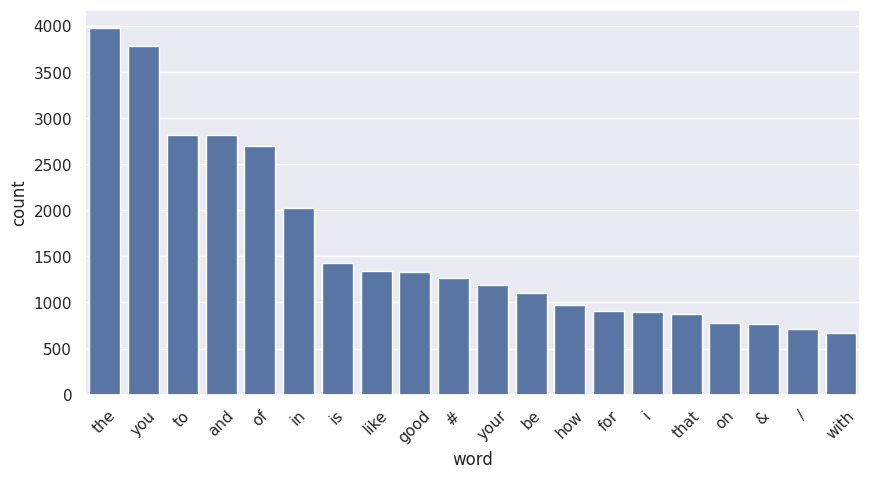

In [27]:
from collections import Counter

words = df1['Tweets'].apply(lambda x: [word for word in x.split()])

# most common words in the dataset (general)
words = [word for sublist in words for word in sublist]
word_count = Counter(words)
word_count.most_common(20)

# visualize the most common words
import matplotlib.pyplot as plt

word_count_df = pd.DataFrame(word_count.most_common(20), columns=['word', 'count'])

plt.figure(figsize=(10, 5))
sns.barplot(x='word', y='count', data=word_count_df)
plt.xticks(rotation=45)
plt.show()

In [28]:
# clean the data

stop_words = set(stopwords.words('english'))
# add some more stop words
stop_words.add('rt') # .......add rt to remove retweet in dataset (noise)



## remove special characters / html entities
def remove_special_char(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

## remove urls
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

## remove usernames and hashtags
def remove_usernames_hashtags(text):
    return re.sub(r'@\w+|#\w+', '', text)

## remove extra spaces
def remove_extra_spaces(text):
    return re.sub(r'\s+', ' ', text)

def remove_word(tweet, word='India'):
    return tweet.replace(word, ' ')


##  clean the text
def clean_text(text):
    text = text.lower()
    text = remove_special_char(text)
    text = remove_urls(text)
    text = remove_usernames_hashtags(text)
    text = remove_extra_spaces(text)
    text=remove_word(text, word='India')
    return text

In [29]:
df1['cleaned_tweet'] = df1['Tweets'].apply(clean_text)
df1

Tweets  \
0     ['if you get to know astir the statistics of r...   
1     ['@ rahulgandhi why it is that anyone who has ...   
2     ['when modi promised â € œminimum government l...   
3     ['talk totally the trumpery and continue all t...   
4     ['asking his supporters prefix chowkidar their...   
...                                                 ...   
7979                   you havegood attitude every day.   
7980                   you havegood attitude every day.   
7981                   you havegood attitude every day.   
7982                   you havegood attitude every day.   
7983                   you havegood attitude every day.   

      Hate or Offensive language - 0 and Not a Hate or Offensive language - 1  \
0                                                     1                         
1                                                     1                         
2                                                     1                         
3                                                     1                         
4                                                     1                         
...                                                 ...                         
7979                                                  1                         
7980                                                  1                         
7981                                                  1                         
7982                                                  1                         
7983                                                  1                         

                                          cleaned_tweet  
0     if you get to know astir the statistics of roa...  
1      rahulgandhi why it is that anyone who has pos...  
2     when modi promised minimum government level be...  
3     talk totally the trumpery and continue all the...  
4     asking his supporters prefix chowkidar their n...  
...                                                 ...  
7979                    you havegood attitude every day  
7980                    you havegood attitude every day  
7981                    you havegood attitude every day  
7982                    you havegood attitude every day  
7983                    you havegood attitude every day  

[7984 rows x 3 columns]

In [30]:
def remove_stop_words(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

df1['cleaned_tweet_two'] = df1['cleaned_tweet'].apply(remove_stop_words)

df1[['Tweets', 'cleaned_tweet', 'cleaned_tweet_two']].head(10)

Tweets  \
0  ['if you get to know astir the statistics of r...   
1  ['@ rahulgandhi why it is that anyone who has ...   
2  ['when modi promised â € œminimum government l...   
3  ['talk totally the trumpery and continue all t...   
4  ['asking his supporters prefix chowkidar their...   
5  ['rahul doesnt crap false promises like modi h...   
6  ["we may have many problems in but we also hav...   
7  ["@ vinodkapri @ rahulgandhi respected indian ...   
8  ["@ potus under biden politics american manufa...   
9  ['wherefore be pakistani / indian dual nationa...   

                                       cleaned_tweet  \
0  if you get to know astir the statistics of roa...   
1   rahulgandhi why it is that anyone who has pos...   
2  when modi promised minimum government level be...   
3  talk totally the trumpery and continue all the...   
4  asking his supporters prefix chowkidar their n...   
5  rahul doesnt crap false promises like modi has...   
6  we may have many problems in but we also have ...   
7   vinodkapri rahulgandhi respected indian citiz...   
8   potus under biden politics american manufactu...   
9  wherefore be pakistani indian dual nationals a...   

                                   cleaned_tweet_two  
0  get know astir statistics road accident every ...  
1  rahulgandhi anyone poseddirect indirect challe...  
2  modi promised minimum government level best go...  
3  talk totally trumpery continue drama leave vot...  
4  asking supporters prefix chowkidar names modi ...  
5  rahul doesnt crap false promises like modi alw...  
6  may many problems also solution amp usa needs ...  
7  vinodkapri rahulgandhi respected indian citize...  
8  potus biden politics american manufacturing di...  
9  wherefore pakistani indian dual nationals allo...

In [32]:
def remove_short_words(text):
    return ' '.join([word for word in text.split() if len(word) > 2])

df1['cleaned_tweet_three'] = df1['cleaned_tweet_two'].apply(remove_short_words)

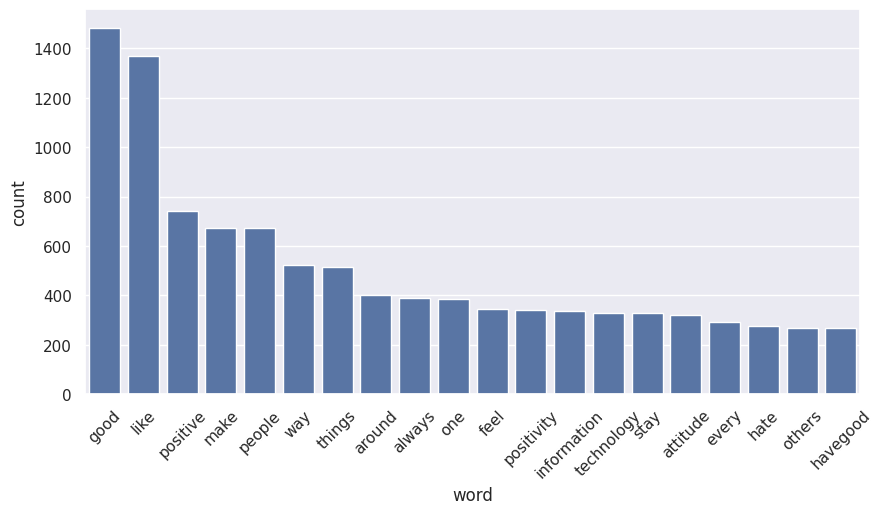

In [33]:
from collections import Counter

words = df1['cleaned_tweet_three'].apply(lambda x: [word for word in x.split()])

# most common words in the dataset (general)
words = [word for sublist in words for word in sublist]
word_count = Counter(words)
word_count.most_common(20)

# visualize the most common words
import matplotlib.pyplot as plt
word_count_df = pd.DataFrame(word_count.most_common(20), columns=['word', 'count'])

plt.figure(figsize=(10, 5))

sns.barplot(x='word', y='count', data=word_count_df)
plt.xticks(rotation=45)
plt.show()


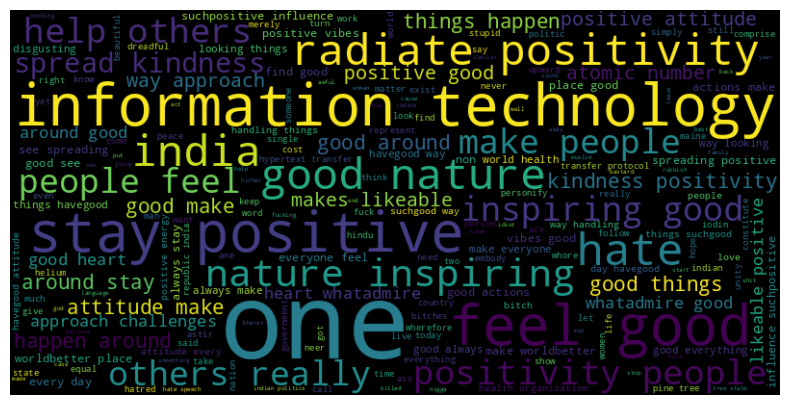

In [34]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(' '.join(words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [35]:
df1

Tweets  \
0     ['if you get to know astir the statistics of r...   
1     ['@ rahulgandhi why it is that anyone who has ...   
2     ['when modi promised â € œminimum government l...   
3     ['talk totally the trumpery and continue all t...   
4     ['asking his supporters prefix chowkidar their...   
...                                                 ...   
7979                   you havegood attitude every day.   
7980                   you havegood attitude every day.   
7981                   you havegood attitude every day.   
7982                   you havegood attitude every day.   
7983                   you havegood attitude every day.   

      Hate or Offensive language - 0 and Not a Hate or Offensive language - 1  \
0                                                     1                         
1                                                     1                         
2                                                     1                         
3                                                     1                         
4                                                     1                         
...                                                 ...                         
7979                                                  1                         
7980                                                  1                         
7981                                                  1                         
7982                                                  1                         
7983                                                  1                         

                                          cleaned_tweet  \
0     if you get to know astir the statistics of roa...   
1      rahulgandhi why it is that anyone who has pos...   
2     when modi promised minimum government level be...   
3     talk totally the trumpery and continue all the...   
4     asking his supporters prefix chowkidar their n...   
...                                                 ...   
7979                    you havegood attitude every day   
7980                    you havegood attitude every day   
7981                    you havegood attitude every day   
7982                    you havegood attitude every day   
7983                    you havegood attitude every day   

                                      cleaned_tweet_two  \
0     get know astir statistics road accident every ...   
1     rahulgandhi anyone poseddirect indirect challe...   
2     modi promised minimum government level best go...   
3     talk totally trumpery continue drama leave vot...   
4     asking supporters prefix chowkidar names modi ...   
...                                                 ...   
7979                        havegood attitude every day   
7980                        havegood attitude every day   
7981                        havegood attitude every day   
7982                        havegood attitude every day   
7983                        havegood attitude every day   

                                    cleaned_tweet_three  
0     get know astir statistics road accident every ...  
1     rahulgandhi anyone poseddirect indirect challe...  
2     modi promised minimum government level best go...  
3     talk totally trumpery continue drama leave vot...  
4     asking supporters prefix chowkidar names modi ...  
...                                                 ...  
7979                        havegood attitude every day  
7980                        havegood attitude every day  
7981                        havegood attitude every day  
7982                        havegood attitude every day  
7983                        havegood attitude every day  

[7984 rows x 5 columns]

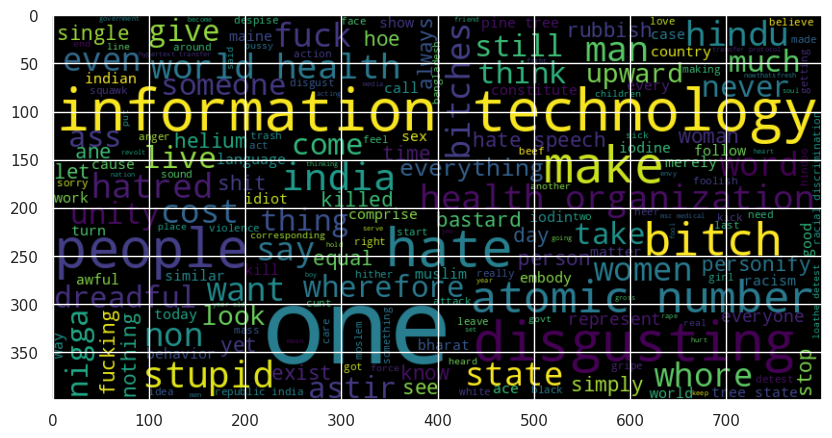

In [36]:
neutral_tweets = df1[df1['Hate or Offensive language - 0 and Not a Hate or Offensive language - 1'] == 0]['cleaned_tweet_three']
neutral_words = neutral_tweets.apply(lambda x: [word for word in x.split()])
neutral_words = [word for sublist in neutral_words for word in sublist]
neutral_word_count = Counter(neutral_words)
neutral_word_count.most_common(20)
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(' '.join(neutral_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')

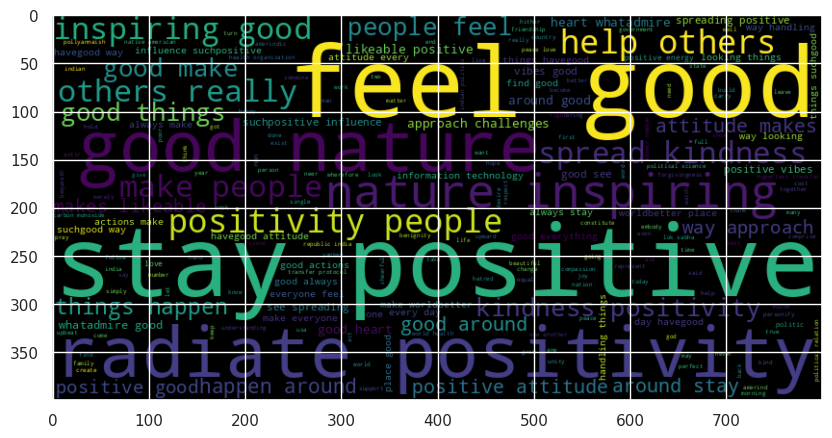

In [37]:
neutral_tweets = df1[df1['Hate or Offensive language - 0 and Not a Hate or Offensive language - 1'] == 1]['cleaned_tweet_three']
neutral_words = neutral_tweets.apply(lambda x: [word for word in x.split()])
neutral_words = [word for sublist in neutral_words for word in sublist]
neutral_word_count = Counter(neutral_words)
neutral_word_count.most_common(20)
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(' '.join(neutral_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')

In [38]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df1['Text_tokenized'] = df1['cleaned_tweet_three'].apply(lambda x: tokenization(x.lower()))
df1.head()

Tweets  \
0  ['if you get to know astir the statistics of r...   
1  ['@ rahulgandhi why it is that anyone who has ...   
2  ['when modi promised â € œminimum government l...   
3  ['talk totally the trumpery and continue all t...   
4  ['asking his supporters prefix chowkidar their...   

   Hate or Offensive language - 0 and Not a Hate or Offensive language - 1  \
0                                                  1                         
1                                                  1                         
2                                                  1                         
3                                                  1                         
4                                                  1                         

                                       cleaned_tweet  \
0  if you get to know astir the statistics of roa...   
1   rahulgandhi why it is that anyone who has pos...   
2  when modi promised minimum government level be...   
3  talk totally the trumpery and continue all the...   
4  asking his supporters prefix chowkidar their n...   

                                   cleaned_tweet_two  \
0  get know astir statistics road accident every ...   
1  rahulgandhi anyone poseddirect indirect challe...   
2  modi promised minimum government level best go...   
3  talk totally trumpery continue drama leave vot...   
4  asking supporters prefix chowkidar names modi ...   

                                 cleaned_tweet_three  \
0  get know astir statistics road accident every ...   
1  rahulgandhi anyone poseddirect indirect challe...   
2  modi promised minimum government level best go...   
3  talk totally trumpery continue drama leave vot...   
4  asking supporters prefix chowkidar names modi ...   

                                      Text_tokenized  
0  [get, know, astir, statistics, road, accident,...  
1  [rahulgandhi, anyone, poseddirect, indirect, c...  
2  [modi, promised, minimum, government, level, b...  
3  [talk, totally, trumpery, continue, drama, lea...  
4  [asking, supporters, prefix, chowkidar, names,...

In [39]:
from nltk.stem import WordNetLemmatizer
wordNet = WordNetLemmatizer()
def lemmatizer(text):
    text = [wordNet.lemmatize(word) for word in text]
    return ' '.join(text)

df1['Text_lemmatized'] = df1['Text_tokenized'].apply(lambda x: lemmatizer(x))
df1.head()

Tweets  \
0  ['if you get to know astir the statistics of r...   
1  ['@ rahulgandhi why it is that anyone who has ...   
2  ['when modi promised â € œminimum government l...   
3  ['talk totally the trumpery and continue all t...   
4  ['asking his supporters prefix chowkidar their...   

   Hate or Offensive language - 0 and Not a Hate or Offensive language - 1  \
0                                                  1                         
1                                                  1                         
2                                                  1                         
3                                                  1                         
4                                                  1                         

                                       cleaned_tweet  \
0  if you get to know astir the statistics of roa...   
1   rahulgandhi why it is that anyone who has pos...   
2  when modi promised minimum government level be...   
3  talk totally the trumpery and continue all the...   
4  asking his supporters prefix chowkidar their n...   

                                   cleaned_tweet_two  \
0  get know astir statistics road accident every ...   
1  rahulgandhi anyone poseddirect indirect challe...   
2  modi promised minimum government level best go...   
3  talk totally trumpery continue drama leave vot...   
4  asking supporters prefix chowkidar names modi ...   

                                 cleaned_tweet_three  \
0  get know astir statistics road accident every ...   
1  rahulgandhi anyone poseddirect indirect challe...   
2  modi promised minimum government level best go...   
3  talk totally trumpery continue drama leave vot...   
4  asking supporters prefix chowkidar names modi ...   

                                      Text_tokenized  \
0  [get, know, astir, statistics, road, accident,...   
1  [rahulgandhi, anyone, poseddirect, indirect, c...   
2  [modi, promised, minimum, government, level, b...   
3  [talk, totally, trumpery, continue, drama, lea...   
4  [asking, supporters, prefix, chowkidar, names,...   

                                     Text_lemmatized  
0  get know astir statistic road accident every m...  
1  rahulgandhi anyone poseddirect indirect challe...  
2  modi promised minimum government level best go...  
3  talk totally trumpery continue drama leave vot...  
4  asking supporter prefix chowkidar name modi gr...

In [40]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def stemmer(text):
    tokens = word_tokenize(text)  # Tokenize the text into words
    stemmed_words = [ps.stem(word) for word in tokens]
    return ''.join(text)

df1['Text_stemming'] = df1['Text_lemmatized'].apply(lambda x: stemmer(x))
df1.head()

Tweets  \
0  ['if you get to know astir the statistics of r...   
1  ['@ rahulgandhi why it is that anyone who has ...   
2  ['when modi promised â € œminimum government l...   
3  ['talk totally the trumpery and continue all t...   
4  ['asking his supporters prefix chowkidar their...   

   Hate or Offensive language - 0 and Not a Hate or Offensive language - 1  \
0                                                  1                         
1                                                  1                         
2                                                  1                         
3                                                  1                         
4                                                  1                         

                                       cleaned_tweet  \
0  if you get to know astir the statistics of roa...   
1   rahulgandhi why it is that anyone who has pos...   
2  when modi promised minimum government level be...   
3  talk totally the trumpery and continue all the...   
4  asking his supporters prefix chowkidar their n...   

                                   cleaned_tweet_two  \
0  get know astir statistics road accident every ...   
1  rahulgandhi anyone poseddirect indirect challe...   
2  modi promised minimum government level best go...   
3  talk totally trumpery continue drama leave vot...   
4  asking supporters prefix chowkidar names modi ...   

                                 cleaned_tweet_three  \
0  get know astir statistics road accident every ...   
1  rahulgandhi anyone poseddirect indirect challe...   
2  modi promised minimum government level best go...   
3  talk totally trumpery continue drama leave vot...   
4  asking supporters prefix chowkidar names modi ...   

                                      Text_tokenized  \
0  [get, know, astir, statistics, road, accident,...   
1  [rahulgandhi, anyone, poseddirect, indirect, c...   
2  [modi, promised, minimum, government, level, b...   
3  [talk, totally, trumpery, continue, drama, lea...   
4  [asking, supporters, prefix, chowkidar, names,...   

                                     Text_lemmatized  \
0  get know astir statistic road accident every m...   
1  rahulgandhi anyone poseddirect indirect challe...   
2  modi promised minimum government level best go...   
3  talk totally trumpery continue drama leave vot...   
4  asking supporter prefix chowkidar name modi gr...   

                                       Text_stemming  
0  get know astir statistic road accident every m...  
1  rahulgandhi anyone poseddirect indirect challe...  
2  modi promised minimum government level best go...  
3  talk totally trumpery continue drama leave vot...  
4  asking supporter prefix chowkidar name modi gr...

In [41]:
df1

Tweets  \
0     ['if you get to know astir the statistics of r...   
1     ['@ rahulgandhi why it is that anyone who has ...   
2     ['when modi promised â € œminimum government l...   
3     ['talk totally the trumpery and continue all t...   
4     ['asking his supporters prefix chowkidar their...   
...                                                 ...   
7979                   you havegood attitude every day.   
7980                   you havegood attitude every day.   
7981                   you havegood attitude every day.   
7982                   you havegood attitude every day.   
7983                   you havegood attitude every day.   

      Hate or Offensive language - 0 and Not a Hate or Offensive language - 1  \
0                                                     1                         
1                                                     1                         
2                                                     1                         
3                                                     1                         
4                                                     1                         
...                                                 ...                         
7979                                                  1                         
7980                                                  1                         
7981                                                  1                         
7982                                                  1                         
7983                                                  1                         

                                          cleaned_tweet  \
0     if you get to know astir the statistics of roa...   
1      rahulgandhi why it is that anyone who has pos...   
2     when modi promised minimum government level be...   
3     talk totally the trumpery and continue all the...   
4     asking his supporters prefix chowkidar their n...   
...                                                 ...   
7979                    you havegood attitude every day   
7980                    you havegood attitude every day   
7981                    you havegood attitude every day   
7982                    you havegood attitude every day   
7983                    you havegood attitude every day   

                                      cleaned_tweet_two  \
0     get know astir statistics road accident every ...   
1     rahulgandhi anyone poseddirect indirect challe...   
2     modi promised minimum government level best go...   
3     talk totally trumpery continue drama leave vot...   
4     asking supporters prefix chowkidar names modi ...   
...                                                 ...   
7979                        havegood attitude every day   
7980                        havegood attitude every day   
7981                        havegood attitude every day   
7982                        havegood attitude every day   
7983                        havegood attitude every day   

                                    cleaned_tweet_three  \
0     get know astir statistics road accident every ...   
1     rahulgandhi anyone poseddirect indirect challe...   
2     modi promised minimum government level best go...   
3     talk totally trumpery continue drama leave vot...   
4     asking supporters prefix chowkidar names modi ...   
...                                                 ...   
7979                        havegood attitude every day   
7980                        havegood attitude every day   
7981                        havegood attitude every day   
7982                        havegood attitude every day   
7983                        havegood attitude every day   

                                         Text_tokenized  \
0     [get, know, astir, statistics, road, accident,...   
1     [rahulgandhi, anyone, poseddirect, indirect, c...   
2     [modi, promised, minimum, government, level, b...   
3   

In [42]:
X = df1["cleaned_tweet_three"]
y = df1["Hate or Offensive language - 0 and Not a Hate or Offensive language - 1"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20)

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [44]:
x = df1["Text_lemmatized"].astype(str)
y=np.array(df1["Hate or Offensive language - 0 and Not a Hate or Offensive language - 1"])
cv=CountVectorizer()
x=cv.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [45]:
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [46]:
test_data="i like you"
df=cv.transform([test_data]).toarray()
print(DT.predict(df))

[1]


In [47]:
def model_evaluate(model,x_test):
    y_pred = model.predict(x_test)
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    cm_df = pd.DataFrame(cm,
                     index = ['hate speech','Neutral'],
                     columns = ['hate speech','Neutral'])

    #Plotting the confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True, cmap="Oranges",linecolor="gray")
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()

              precision    recall  f1-score   support

           0       0.93      0.85      0.88      1057
           1       0.90      0.96      0.93      1578

    accuracy                           0.91      2635
   macro avg       0.91      0.90      0.91      2635
weighted avg       0.91      0.91      0.91      2635



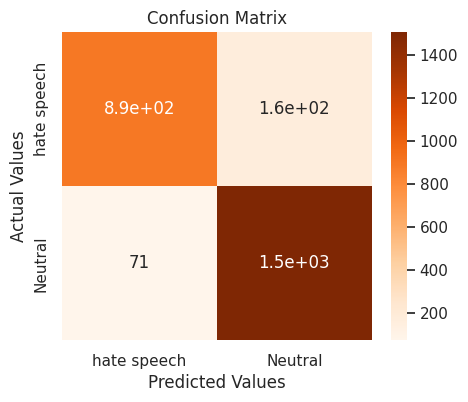

In [48]:
 model_evaluate(DT,x_test)